## №6.1.8

m = 0
sigma = 2.3268, coefs = [4.41]
----------------------
m = 1
sigma = 0.1210, coefs = [0.9  2.34]
----------------------
m = 2
sigma = 0.1282, coefs = [0.91 2.32 0.01]
----------------------
m = 3
sigma = 0.1305, coefs = [ 0.96  2.05  0.24 -0.05]
----------------------
m = 4
sigma = 0.1408, coefs = [ 0.97  1.99  0.35 -0.11  0.01]
----------------------
m = 5
sigma = 0.1295, coefs = [ 1.01  0.81  3.58 -3.14  1.17 -0.15]
----------------------
m = 6
sigma = 0.1266, coefs = [  1.03  -0.53   9.05 -10.99   6.22  -1.65   0.17]
----------------------
m = 7
sigma = 0.1220, coefs = [  1.02   1.68  -3.21  13.41 -16.87   9.6   -2.56   0.26]
----------------------
m = 8
sigma = 0.1463, coefs = [  1.02   3.02 -12.51  37.26 -47.21  30.79 -10.83   1.95  -0.14]
----------------------
m = 9
sigma = 0.2025, coefs = [   1.02    6.43  -40.    122.52 -183.69  156.52  -80.06   24.44   -4.12
    0.29]
----------------------


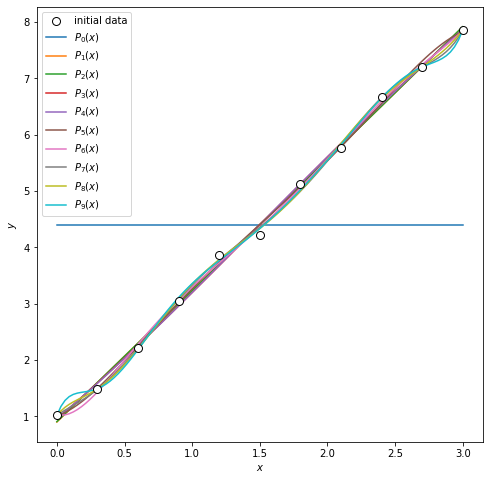

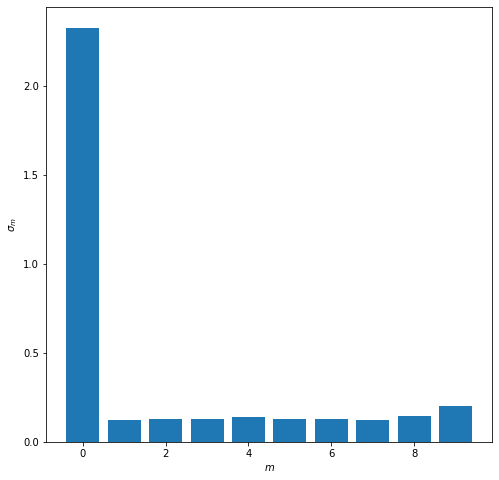

Optimal solution: m* = 1, sigma = 0.120964
P_m*(x)=-0.052*x^3+0.241x^2+2.050x^1+0.960


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mnk(x, y, m):
    G = np.zeros((m + 1, m + 1), dtype=np.float64)
    b = np.zeros(m + 1, dtype=np.float64)
    for i, _ in enumerate(b):
        b[i] = np.sum(y * (x ** i))
    for r, row in enumerate(G):
        for c, _ in enumerate(row):
            G[r, c] = np.sum(x**(r+c))
    return np.linalg.solve(G, b)

def P(a, x):
    return sum(a_i* (x**i) for i, a_i in enumerate(a))

def count_sigma(x, y, a):
    return np.sqrt(np.sum((P(a, x) - y) ** 2)/(len(x)  - len(a)))

x = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3])
y = np.array([1.019, 1.4889, 2.2079, 3.0548, 3.8648, 4.2161, 5.1180, 5.7661, 6.6720, 7.1960, 7.8551])
polynoms = []
sigs = []
for m in range(0, 10, 1):
    p = mnk(x, y, m)
    polynoms.append(p)
    sigs.append(count_sigma(x, y, p))

plt.figure(figsize=(8,8))
plt.scatter(x, y, c="w", edgecolors='k', label = "initial data", s=64, zorder=10)

x_points = np.linspace(0, 3, 100)
with np.printoptions(2):
    for i, (p,s)  in enumerate(zip(polynoms, sigs)):
        print(f"m = {i}")
        print(f"sigma = {s:.4f}, coefs = {p}")
        print("----------------------")
for m, p in enumerate(polynoms):
    plt.plot(x_points, P(p, x_points), label=f"$P_{m}(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
plt.xlabel("$m$")
plt.ylabel(r"$\sigma_m$")
plt.bar(range(0, 10), sigs)
plt.show()

print(f"Optimal solution: m* = 1, sigma = {sigs[1]:.6f}")
print(f"P_m*(x)={polynoms[3][-1]:.3f}*x^{len(polynoms[3])-1}", end="")
for i, coef in zip(range(len(polynoms[3]) - 2, 0, -1), reversed(polynoms[3][:-1])):
    print(f"{coef:+.3f}x^{i}",end="")
print(f"{polynoms[3][0]:+.3f}")

## №6.2.2

Velocity: v = 21.889490
Position of point: x(2T) = 254.63301370996254


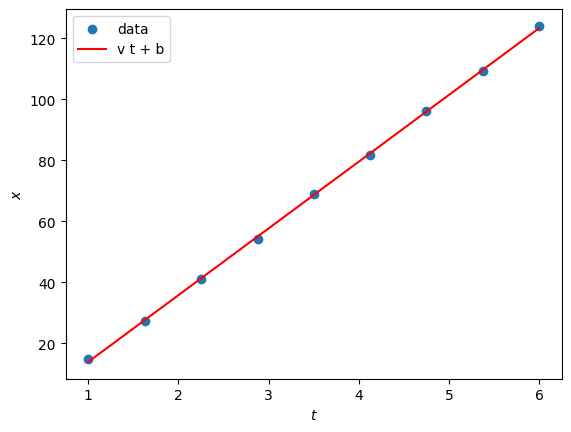

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def mnk(x, y, m):
    G = np.zeros((m + 1, m + 1), dtype=np.float64)
    b = np.zeros(m + 1, dtype=np.float64)
    for i, _ in enumerate(b):
        b[i] = np.sum(y * (x ** i))
    for r, row in enumerate(G):
        for c, _ in enumerate(row):
            G[r, c] = np.sum(x**(r+c))
    return np.linalg.solve(G, b)

def P(a, x):
    return sum(a_i* (x**i) for i, a_i in enumerate(a))

t = np.array([1, 1.625, 2.25, 2.88, 3.5, 4.13, 4.75, 5.375, 6])
x = np.array([14.86, 27.15, 41.19, 54, 69.03, 81.6, 96.11, 109.4, 124.03])
T = t[-1]
b, v = mnk(t, x, 1)
print(f"Velocity: v = {v:.6f}")
print(f"Position of point: x(2T) = {2 * T * v + b}")
plt.scatter(t, x, label="data")
points = np.linspace(1, 6, 5)
plt.plot(points, v * points + b, label="v t + b", c="r")
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend()
plt.show()

## №6.7.4

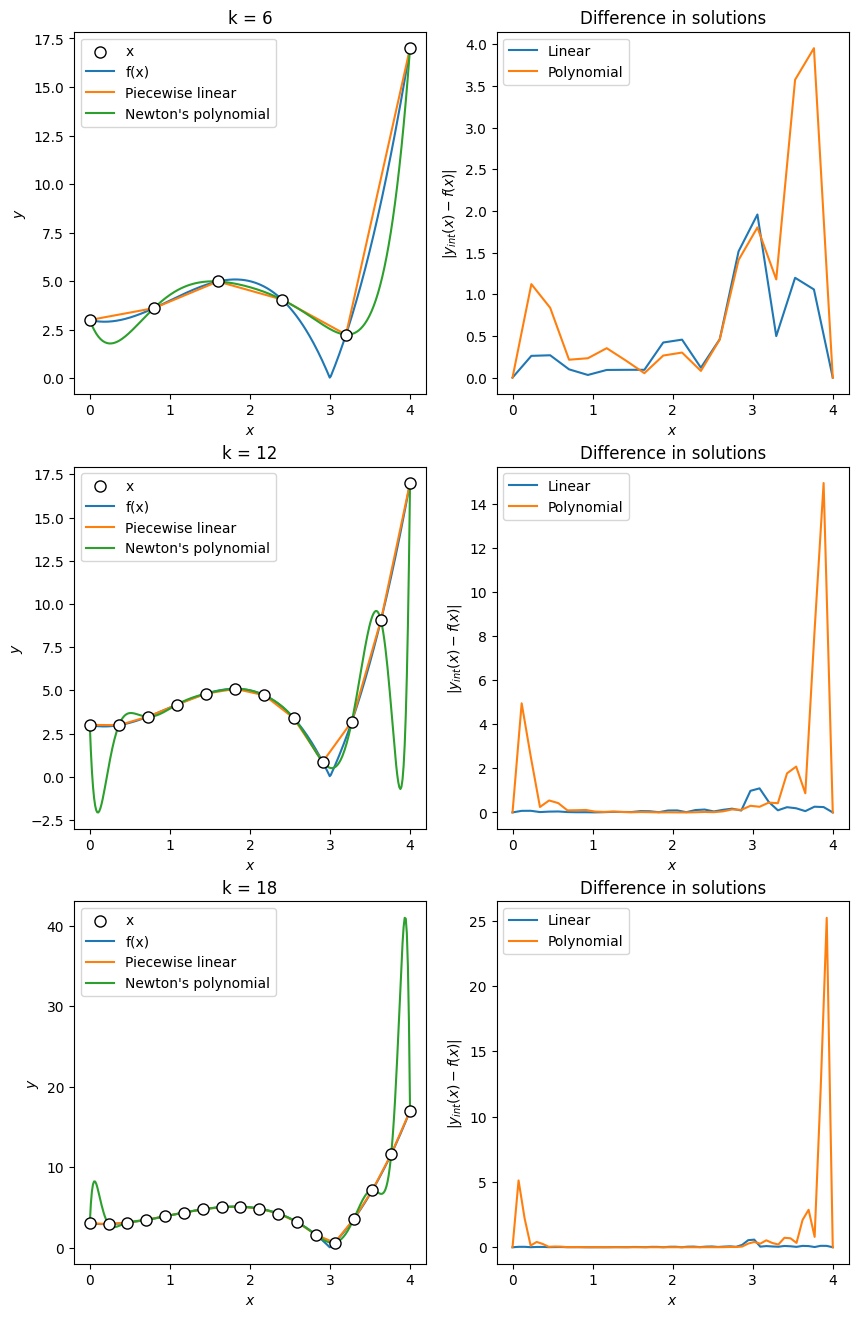

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x0, y0, x1, y1):
    def func(x):
        return y0 + (x-x0)/(x1-x0)*(y1-y0)
    return func

def make_lin_interp(nodes, lines):
    def inter(x):
        if x - nodes[0] < -1e-12 or x - nodes[-1]> 1e-12:
            raise ValueError(f"Function is not defined in ({nodes[0], nodes[-1]})")
        for x_curr, x_next, line in zip(nodes[:-1], nodes[1:], lines):
            if x_curr - 1e-12 <= x <= x_next + 1e-12:
                return line(x)
    return np.vectorize(inter)

def f(x):
    return np.abs(x - 3)*(x**2 + 1)

def newton_polynomial_coefs(x, y):
    a = np.copy(y)
    for i in range(1, len(x)):
        a[i:] = (a[i:] - a[i-1])/(x[i:]-x[i-1])
    return a

def newton_polynomial(x, y):
    n = len(x)
    coefs = newton_polynomial_coefs(x, y)
    def poly(x_points):
        p = coefs[-1]
        for i in range(n -  1, -1, -1):
            p = p * (x_points-x[i]) + coefs[i]
        return p
    return poly


k = [6, 12, 18]
a, b = 0, 4
fig, ax = plt.subplots(3, 2, figsize=(10, 16))
for i, k_ in enumerate(k):
    x_k = np.linspace(a, b, k_)
    x_3k = np.linspace(a, b, 3 * k_)
    x_points = np.linspace(a, b, 300)
    y_k = f(x_k)
    y_3k = f(x_3k)

    lin_interp = []
    ff = []
    for _ , (x_prev, y_prev, x_curr, y_curr) in enumerate(zip(x_k[:-1], y_k[:-1], x_k[1:], y_k[1:])):
        ff.append(linear(x_prev, y_prev, x_curr, y_curr))
    lin_interp_f = make_lin_interp(x_k, ff)
    lin_interp = lin_interp_f(x_3k)
    poly = newton_polynomial(x_k, y_k)
    poly_3k = poly(x_3k)
    delta_linear = abs(y_3k - lin_interp)
    delta_polynomial = abs(y_3k - poly_3k)
    ax[i, 0].set_xlabel("$x$")
    ax[i, 0].set_ylabel("$y$")
    ax[i, 0].set_title(f"k = {k_}")
    ax[i, 0].scatter(x_k, y_k, c="w", edgecolors='k', label = "x",s=64, zorder=10)
    ax[i, 0].plot(x_points, f(x_points), label = "f(x)")
    ax[i, 0].plot(x_points, lin_interp_f(x_points), label = "Piecewise linear")
    ax[i, 0].plot(x_points, poly(x_points), label = "Newton's polynomial")
    ax[i, 0].legend()
    ax[i, 1].set_xlabel("$x$")
    ax[i, 1].set_ylabel("$|y_{int}(x) - f(x)|$")
    ax[i, 1].set_title("Difference in solutions")
    ax[i, 1].plot(x_3k, delta_linear, label=f"Linear")
    ax[i, 1].plot(x_3k, delta_polynomial, label=f"Polynomial")
    ax[i, 1].legend()
plt.show()


## №6.8.4

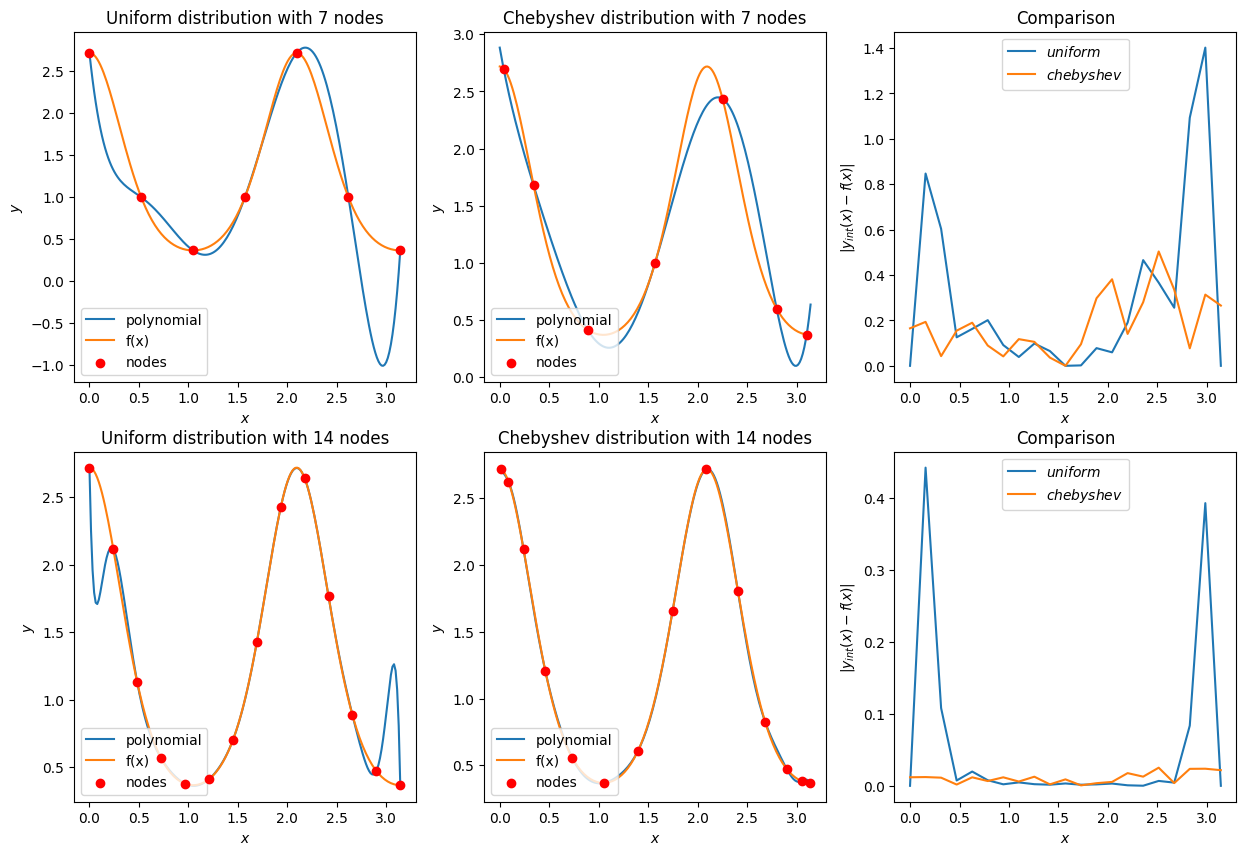

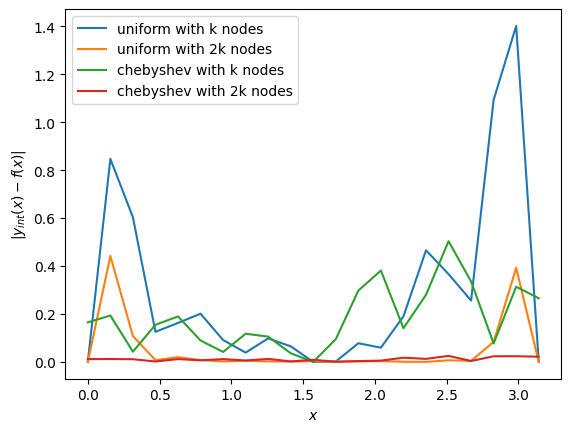

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.exp(np.cos(3 * x))

def global_polynomial_interpolation(x, y):
    n = len(x)
    A = np.zeros((n, n), dtype=np.float64)
    for power in range(0, n):
            A[:, power] = x ** power
    a = np.linalg.solve(A, y)
    def interpolation_polynom(x):
        return sum(a_i * (x**power) for power, a_i in enumerate(a))
    return interpolation_polynom

k = [7]
a, b = 0, np.pi
x_points = np.linspace(a, b, 200)
fig, ax = plt.subplots(2 * len(k), 3, figsize=(15, 10))
for i, k_ in enumerate(k):
    x_k = np.linspace(a, b, k_)
    x_2k = np.linspace(a, b, 2 * k_)
    x_3k = np.linspace(a, b, 3 * k_)
    x_chebyshev = np.array([(a + b) / 2 + (b - a) / 2 * np.cos((2 * n + 1)/ (2 * k_) * np.pi) for n in range(k_)])
    x_chebyshev_2k = np.array([(a + b) / 2 + (b - a) / 2 * np.cos((2 * n + 1)/ (4 * k_) * np.pi) for n in range(2 * k_)])
    poly_k = global_polynomial_interpolation(x_k, f(x_k))
    poly_2k = global_polynomial_interpolation(x_2k, f(x_2k))
    poly_chebyshev_k = global_polynomial_interpolation(x_chebyshev, f(x_chebyshev))
    poly_chebyshev_2k = global_polynomial_interpolation(x_chebyshev_2k, f(x_chebyshev_2k))
    delta_unifrom = []
    delta_chebyshev = []
    delta_unifrom.append(np.abs(f(x_3k) - poly_k(x_3k)))
    delta_unifrom.append(np.abs(f(x_3k) - poly_2k(x_3k)))
    delta_chebyshev.append(np.abs(f(x_3k) - poly_chebyshev_k(x_3k)))
    delta_chebyshev.append(np.abs(f(x_3k) - poly_chebyshev_2k(x_3k)))
    for points , (j, foo) in zip([x_k, x_chebyshev, x_2k, x_chebyshev_2k],
                                 enumerate([poly_k, poly_chebyshev_k, poly_2k, poly_chebyshev_2k])):
        row = i + j // 2
        col = j % 2
        nodes = (row + 1) * k_
        distr = "Chebyshev" if col else "Uniform"
        ax[row, col].set_title(f"{distr} distribution with {nodes} nodes")
        ax[row, col].plot(x_points, foo(x_points), label = "polynomial")
        ax[row, col].plot(x_points, f(x_points), label="f(x)")
        ax[row, col].scatter(points, f(points), c="r", zorder=10, label="nodes")
        ax[row, col].set_xlabel("$x$")
        ax[row, col].set_ylabel("$y$")
        ax[row, col].legend(loc="lower left")
    for j, (uni, cheb, num) in enumerate(zip(delta_unifrom, delta_chebyshev, [k, 2 * k])):
        ax[i + j, 2].set_title("Comparison")
        ax[i + j, 2].set_xlabel("$x$")
        ax[i + j, 2].set_ylabel("$|y_{int}(x) - f(x)|$")
        ax[i + j, 2].plot(x_3k, uni, label="$uniform$")
        ax[i + j, 2].plot(x_3k, cheb, label="$chebyshev$") 
        ax[i + j, 2].legend(loc="upper center")
plt.show()
plt.plot(x_3k, delta_unifrom[0], label = "uniform with k nodes")
plt.plot(x_3k, delta_unifrom[1], label = "uniform with 2k nodes")
plt.plot(x_3k, delta_chebyshev[0], label = "chebyshev with k nodes")
plt.plot(x_3k, delta_chebyshev[1], label = "chebyshev with 2k nodes")
plt.xlabel("$x$")
plt.ylabel("$|y_{int}(x) - f(x)|$")
plt.legend()
plt.show()